In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = '/content/ALGONQUIN_PARK_Ontario_Canada.csv'
data = pd.read_csv(file_path)

data.head()


,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Mean Max Temp (°C),Mean Max Temp Flag,Mean Min Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow Grnd Last Day (cm),Snow Grnd Last Day Flag,Dir of Max Gust (10's deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,-78.55,45.58,ALGONQUIN PARK,6080189,1917-01,1917,1,NaN,M,NaN,...,NaN,M,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN
1,-78.55,45.58,ALGONQUIN PARK,6080189,1917-02,1917,2,NaN,M,NaN,...,NaN,M,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN
2,-78.55,45.58,ALGONQUIN PARK,6080189,1917-03,1917,3,NaN,M,NaN,...,NaN,M,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN
3,-78.55,45.58,ALGONQUIN PARK,6080189,1917-04,1917,4,NaN,M,NaN,...,NaN,M,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN
4,-78.55,45.58,ALGONQUIN PARK,6080189,1917-05,1917,5,NaN,M,NaN,...,NaN,M,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:

columns_of_interest = [
    "Mean Max Temp (°C)", "Mean Min Temp (°C)", "Mean Temp (°C)",
    "Extr Max Temp (°C)", "Extr Min Temp (°C)", "Total Rain (mm)",
    "Total Snow (cm)", "Total Precip (mm)"
]


null_counts = data[columns_of_interest].isnull().sum()
descriptive_stats = data[columns_of_interest].describe()

null_counts, descriptive_stats


(Mean Max Temp (°C)    10
 Mean Min Temp (°C)    10
 Mean Temp (°C)        10
 Extr Max Temp (°C)    14
 Extr Min Temp (°C)    15
 Total Rain (mm)       15
 Total Snow (cm)       15
 Total Precip (mm)     15
 dtype: int64,
        Mean Max Temp (°C)  Mean Min Temp (°C)  Mean Temp (°C)  \
 count          518.000000          518.000000      518.000000   
 mean             9.760232           -2.285714        3.741892   
 std             11.394462           10.761157       11.044270   
 min            -12.800000          -28.300000      -19.400000   
 25%             -1.300000          -12.175000       -6.650000   
 50%             10.200000           -0.850000        5.050000   
 75%             20.900000            7.775000       14.400000   
 max             28.600000           15.200000       21.300000   
 
        Extr Max Temp (°C)  Extr Min Temp (°C)  Total Rain (mm)  \
 count          514.000000          513.000000       513.000000   
 mean            19.046109          -13.850487 

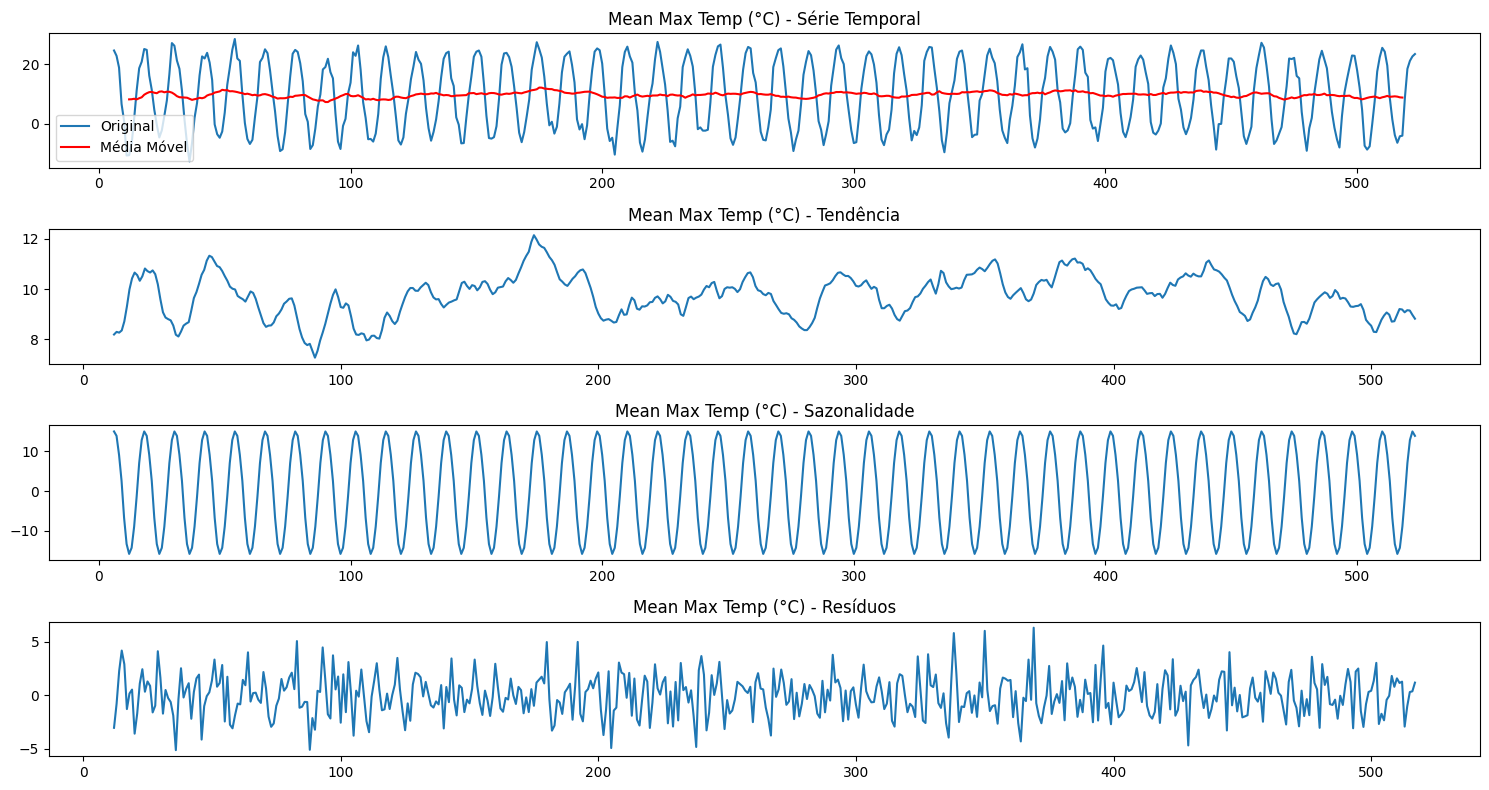

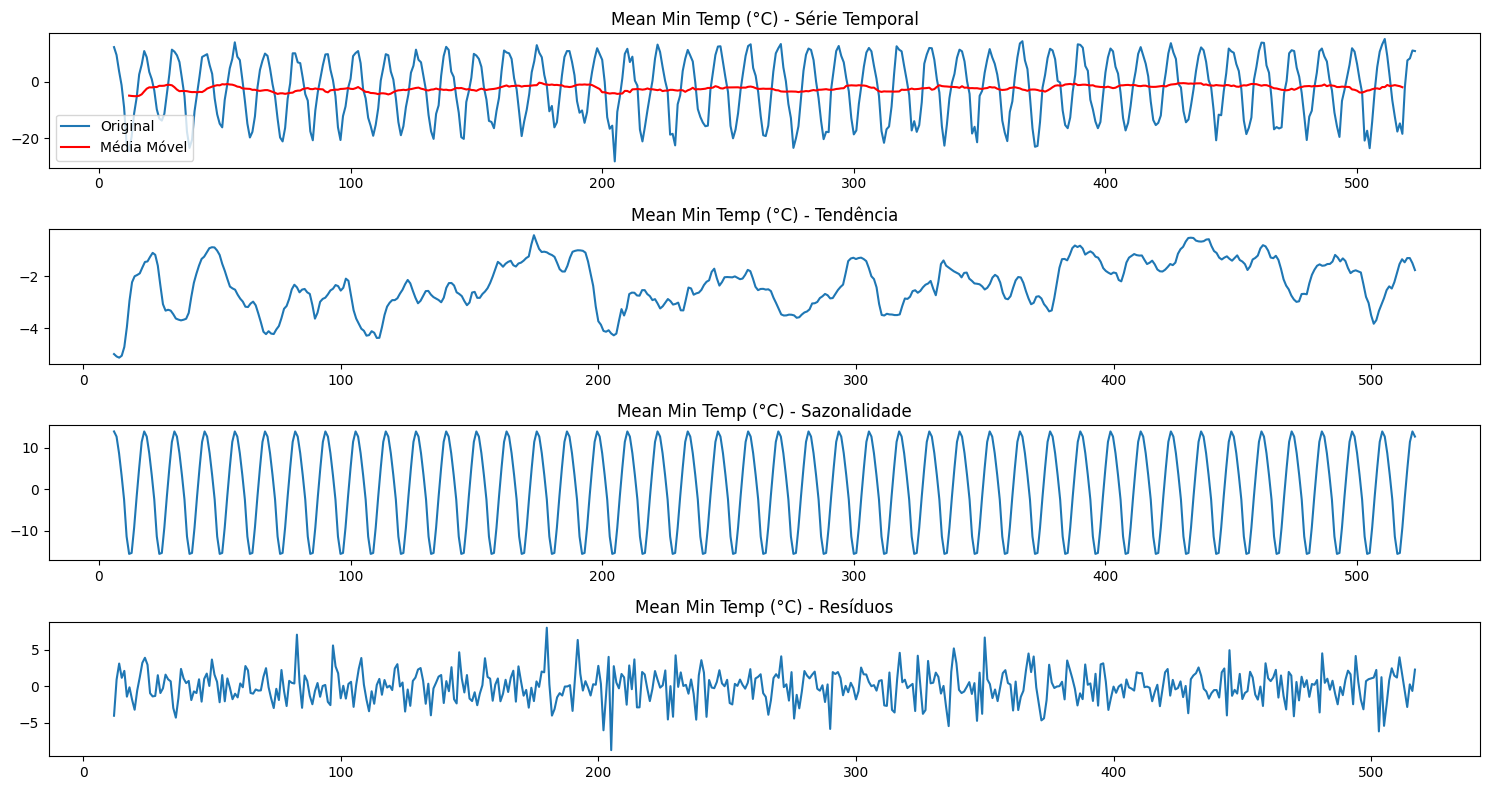

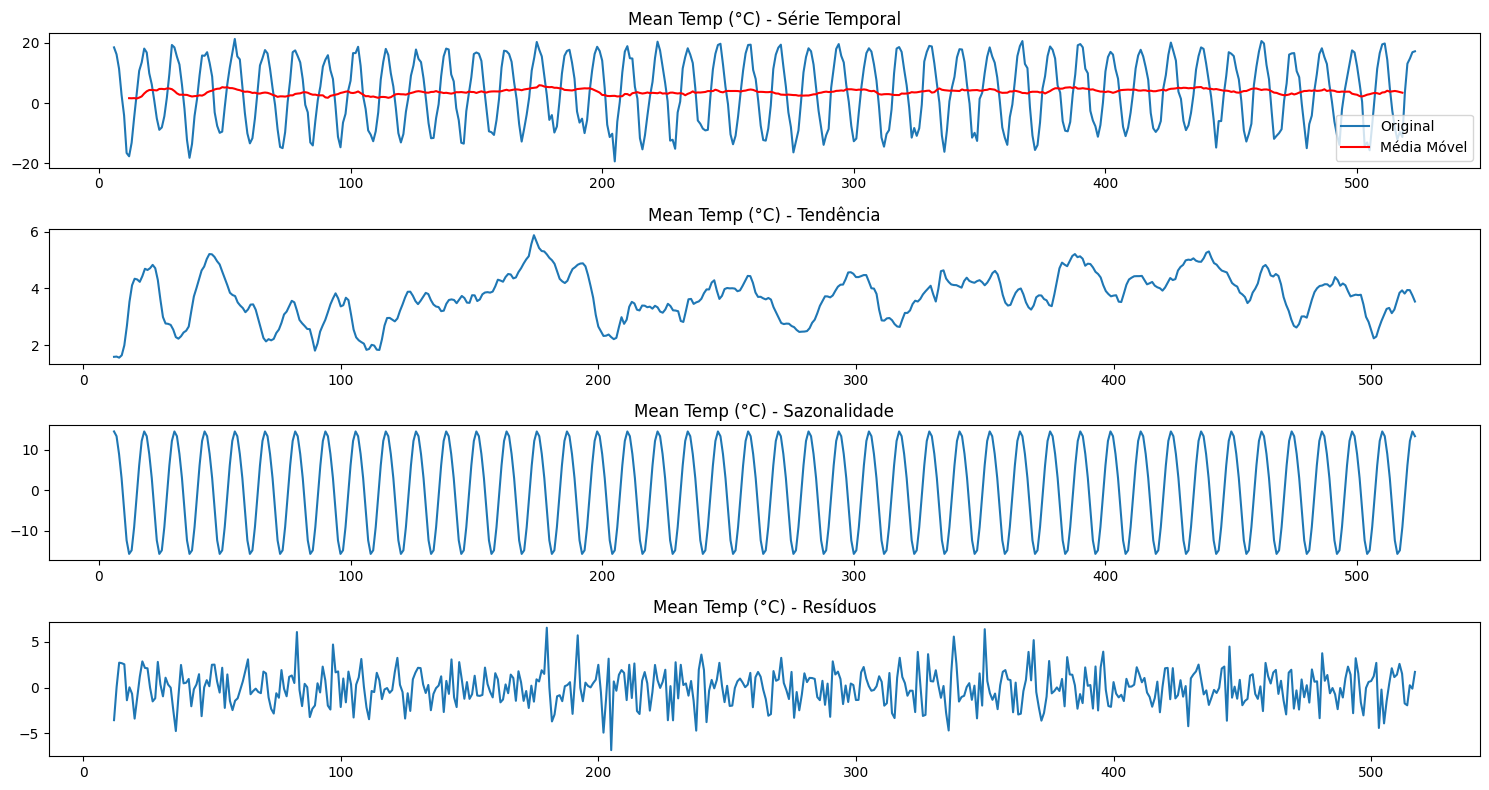

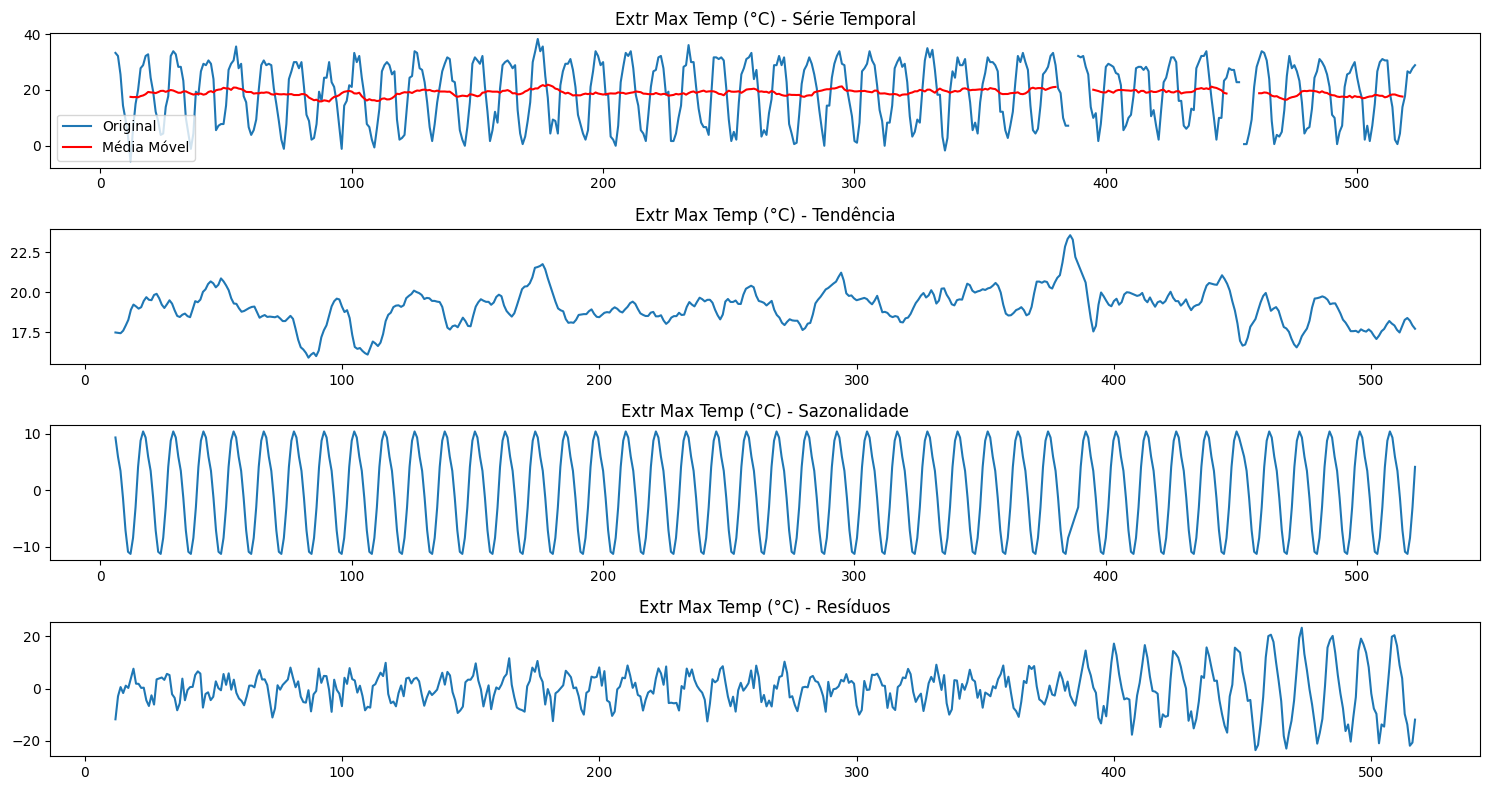

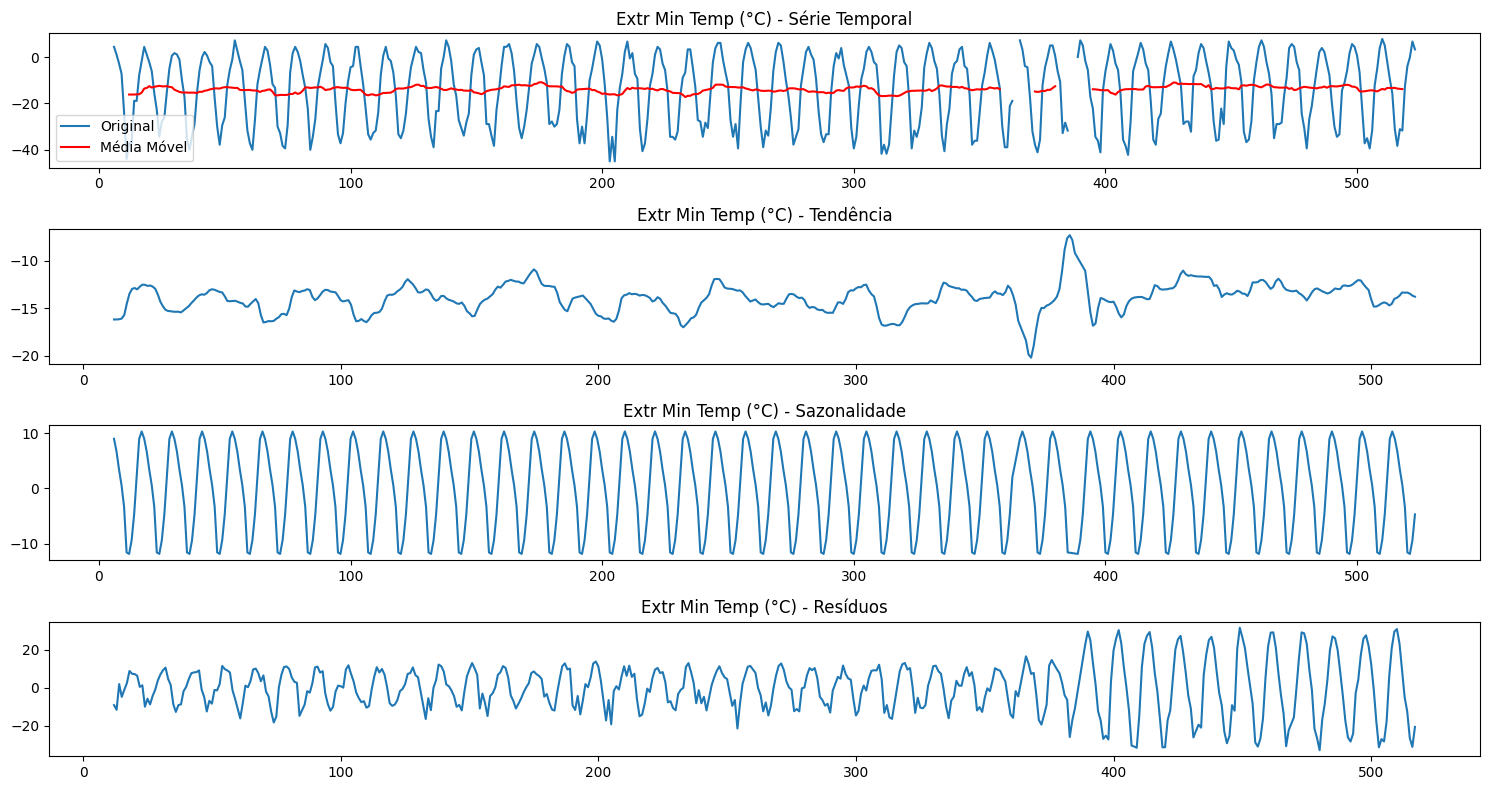

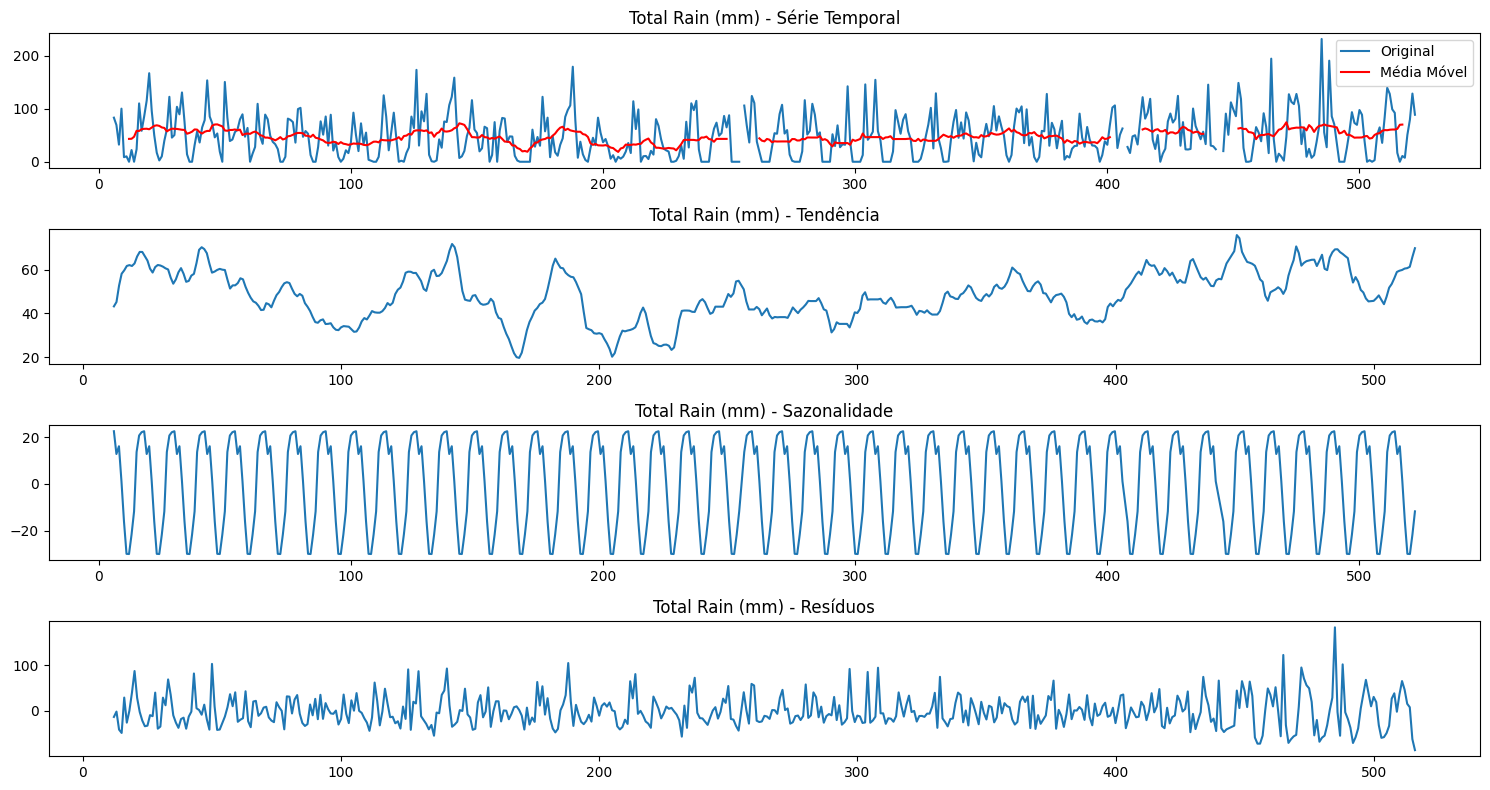

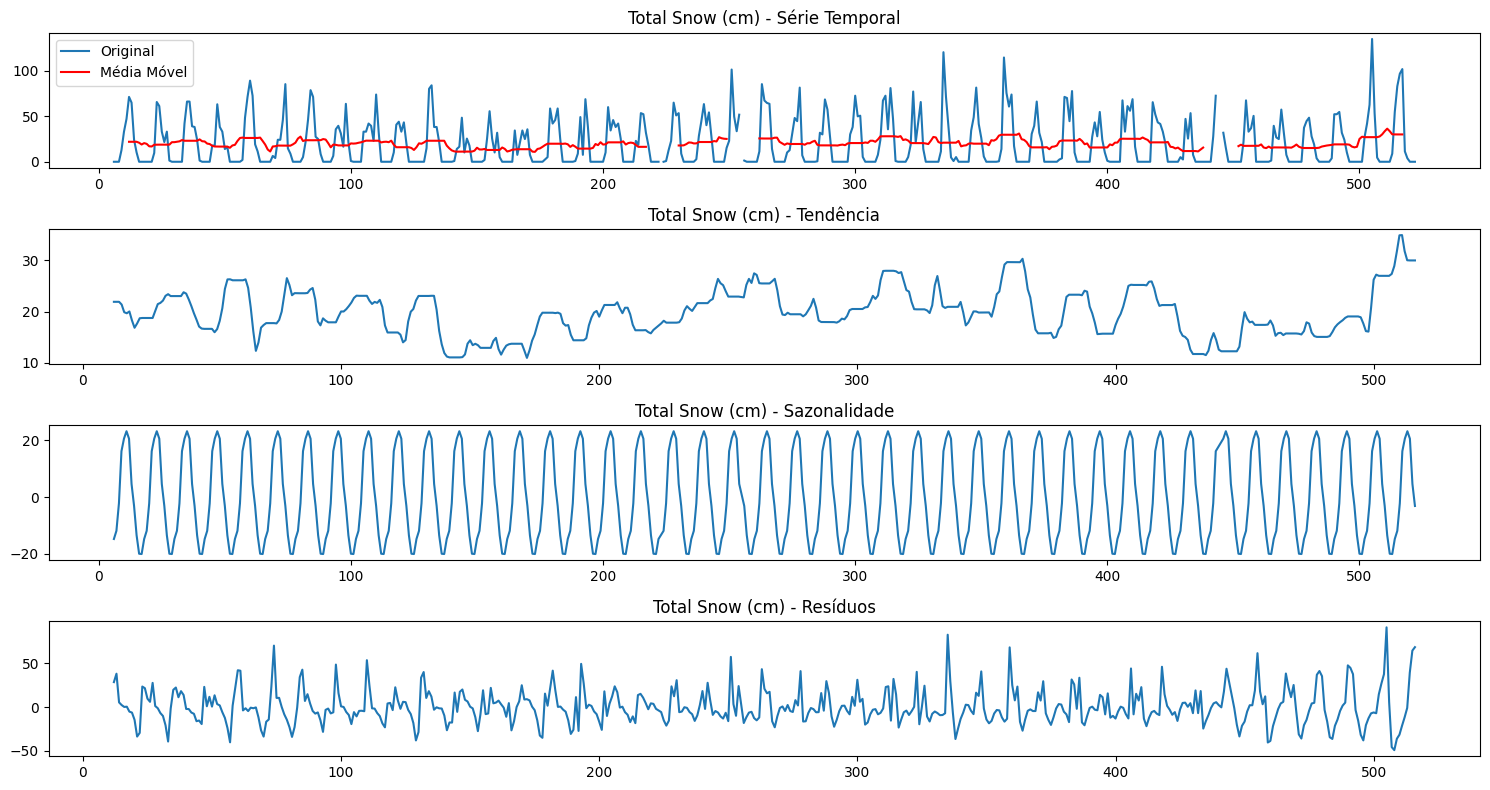

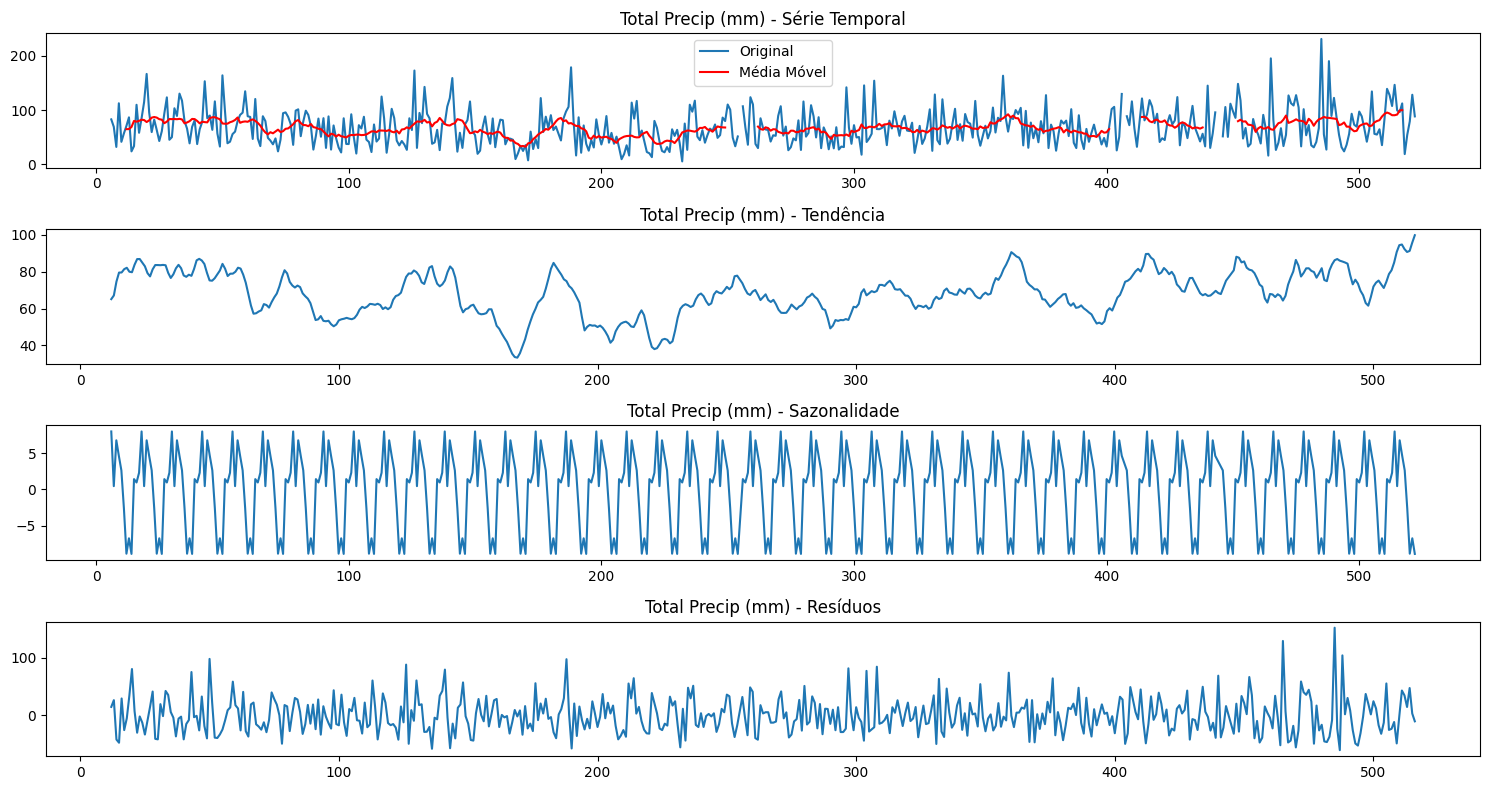

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose


def plot_series_with_decomposition(series, title, window=12):

    series_rolling = series.rolling(window=window, center=True).mean()

    decomposition = seasonal_decompose(series.dropna(), model='additive', period=12)

    plt.figure(figsize=(15, 8))

    plt.subplot(411)
    plt.plot(series, label='Original')
    plt.plot(series_rolling, color='red', label='Média Móvel')
    plt.title(f'{title} - Série Temporal')
    plt.legend()


    plt.subplot(412)
    plt.plot(decomposition.trend, label='Tendência')
    plt.title(f'{title} - Tendência')

    plt.subplot(413)
    plt.plot(decomposition.seasonal, label='Sazonalidade')
    plt.title(f'{title} - Sazonalidade')

    plt.subplot(414)
    plt.plot(decomposition.resid, label='Resíduos')
    plt.title(f'{title} - Resíduos')

    plt.tight_layout()
    plt.show()

for column in columns_of_interest:
    plot_series_with_decomposition(data[column], column)
